submitted by Alejandro Hohmann

DSE 241: Exercise 4 Data

HAAS -- BIGHORN SHEEP DOMINANCE

Source: http://moreno.ss.uci.edu/data.html#sheep

### Description: 
    - sheep_age.csv:  
        - Two Columns: Sheep_ID, Sheep_Age
    - sheep_edges.csv: 
        - Three Columns: Source_Sheep_ID, Target_Sheep_ID, Weight

### Background:
Data record wins and losses for 28 female bighorn sheep observed on the National Bison Range in 1984. The 'Weight' entry is the number of occasions on which the Source sheep was observed dominating the Target sheep. Ages are listed, but those assigned an age of 9 are at least 9 years old; they may be older.

#### Reference:
    Christine Hass, "Social status in female bighorn sheep (Ovis canadensis): expression, development and reproductive correlates." Journal of the Zoological Society of London, 1991, 225: 509-523.Station, Technical Bulletin 73. 

https://community.plotly.com/t/displaying-edge-labels-of-networkx-graph-in-plotly/39113/2

running from `venv_sheep` with python 3.9

In [1]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import plotly.graph_objs as go
from collections import OrderedDict
import webbrowser

In [3]:
# for reference
edge_df = pd.read_csv("../../data/sheep_data/sheep_edges.csv")
edge_df

,source,target,weight
0,1,2,1
1,1,3,1
2,1,4,1
3,1,5,1
4,1,6,1
...,...,...,...
245,26,6,2
246,20,26,1
247,20,21,3
248,27,26,1


In [4]:
# for reference
age_df = pd.read_csv("../../data/sheep_data/sheep_age.csv")
age_df

,id,age
0,1,8
1,2,8
2,3,4
3,4,7
4,5,8
5,6,3
6,7,5
7,8,4
8,9,7
9,10,9


In [5]:
edge_df['weight'].max()

12

<Axes: >

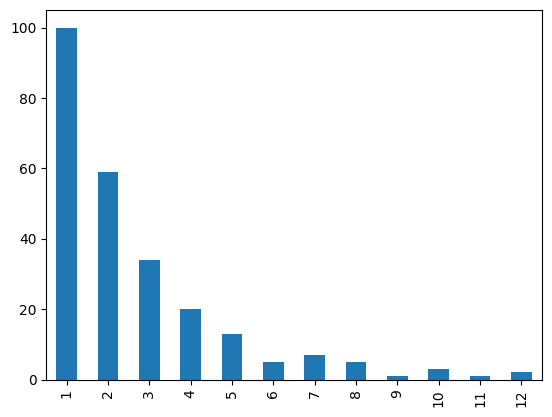

In [6]:
edge_df['weight'].value_counts().sort_index().plot(kind='bar')

In [7]:
edge_df[edge_df['weight'] == 12]

,source,target,weight
23,22,3,12
28,22,23,12


time to make the graph :)

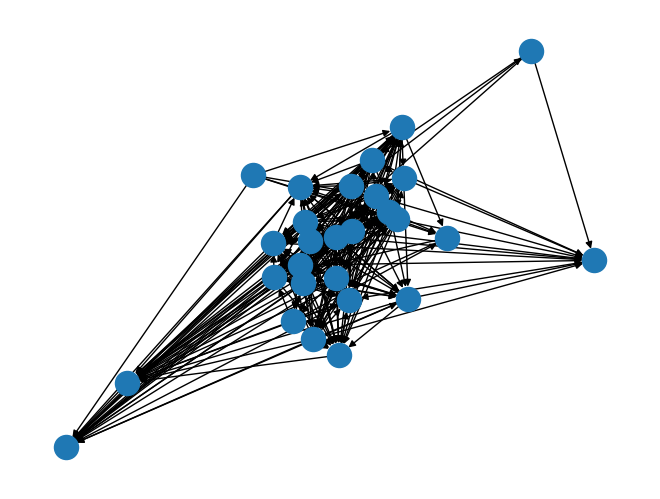

In [8]:
# read in the graph data
# no need to use the csvs, it's already been configured in this alternate file
G = nx.read_graphml("../../data/sheep_ml.graphml")
nx.draw(G)
plt.show()

In [9]:
G.is_directed()

True

In [10]:
G.nodes()

NodeView(('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28'))

In [11]:
G.edges()

OutEdgeView([('1', '2'), ('1', '3'), ('1', '4'), ('1', '5'), ('1', '6'), ('2', '4'), ('2', '7'), ('2', '8'), ('2', '9'), ('2', '12'), ('2', '13'), ('2', '15'), ('2', '21'), ('2', '22'), ('2', '23'), ('2', '24'), ('2', '26'), ('2', '27'), ('2', '28'), ('3', '2'), ('3', '4'), ('3', '5'), ('3', '6'), ('3', '8'), ('3', '9'), ('3', '14'), ('3', '15'), ('3', '16'), ('3', '18'), ('3', '19'), ('3', '20'), ('3', '21'), ('3', '23'), ('3', '24'), ('3', '25'), ('3', '26'), ('3', '28'), ('4', '2'), ('4', '3'), ('4', '5'), ('4', '6'), ('4', '11'), ('4', '12'), ('4', '15'), ('4', '16'), ('4', '18'), ('4', '19'), ('4', '20'), ('4', '21'), ('4', '23'), ('4', '24'), ('4', '25'), ('4', '26'), ('4', '27'), ('5', '16'), ('5', '21'), ('7', '3'), ('7', '4'), ('7', '8'), ('7', '9'), ('7', '10'), ('7', '11'), ('7', '12'), ('7', '13'), ('7', '14'), ('7', '15'), ('7', '16'), ('7', '17'), ('7', '18'), ('7', '19'), ('7', '20'), ('7', '21'), ('8', '3'), ('8', '4'), ('8', '6'), ('8', '9'), ('8', '13'), ('8', '15'), 

In [12]:
G.edges.data()

OutEdgeDataView([('1', '2', {'weight': 1}), ('1', '3', {'weight': 1}), ('1', '4', {'weight': 1}), ('1', '5', {'weight': 1}), ('1', '6', {'weight': 1}), ('2', '4', {'weight': 1}), ('2', '7', {'weight': 1}), ('2', '8', {'weight': 5}), ('2', '9', {'weight': 3}), ('2', '12', {'weight': 1}), ('2', '13', {'weight': 2}), ('2', '15', {'weight': 1}), ('2', '21', {'weight': 4}), ('2', '22', {'weight': 1}), ('2', '23', {'weight': 2}), ('2', '24', {'weight': 3}), ('2', '26', {'weight': 5}), ('2', '27', {'weight': 2}), ('2', '28', {'weight': 4}), ('3', '2', {'weight': 1}), ('3', '4', {'weight': 1}), ('3', '5', {'weight': 1}), ('3', '6', {'weight': 5}), ('3', '8', {'weight': 1}), ('3', '9', {'weight': 7}), ('3', '14', {'weight': 7}), ('3', '15', {'weight': 5}), ('3', '16', {'weight': 2}), ('3', '18', {'weight': 3}), ('3', '19', {'weight': 5}), ('3', '20', {'weight': 6}), ('3', '21', {'weight': 1}), ('3', '23', {'weight': 8}), ('3', '24', {'weight': 2}), ('3', '25', {'weight': 3}), ('3', '26', {'weig

##### play around with different layouts

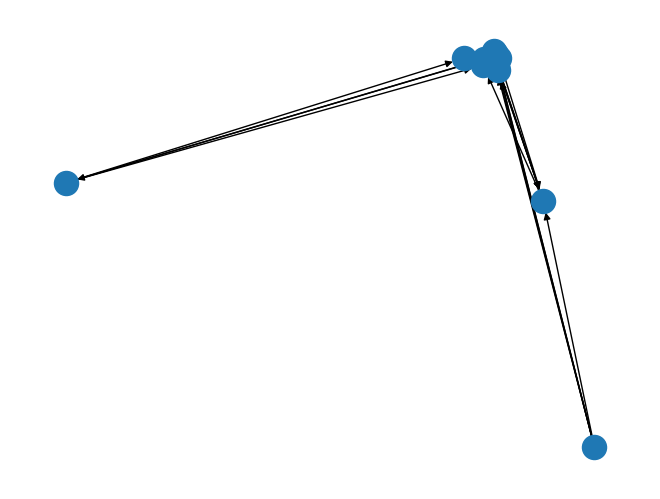

In [13]:
# SPECTRAL
pos = nx.spectral_layout(G, center=[22,3])
nx.draw(G, pos=pos)

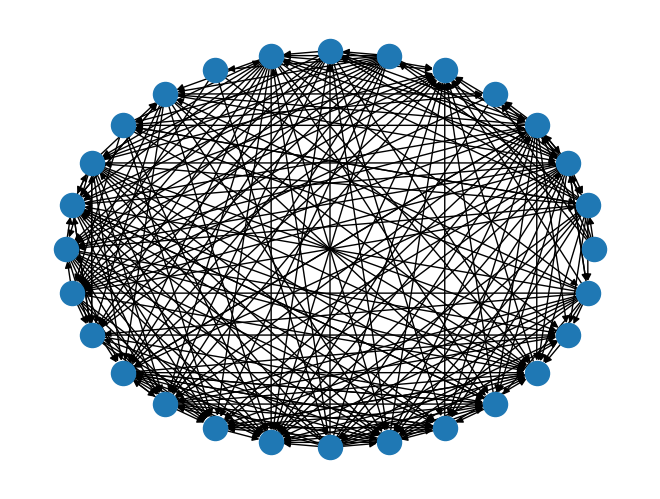

In [14]:
# CIRCULAR
pos = nx.circular_layout(G, center=[22,3])
nx.draw(G, pos=pos)

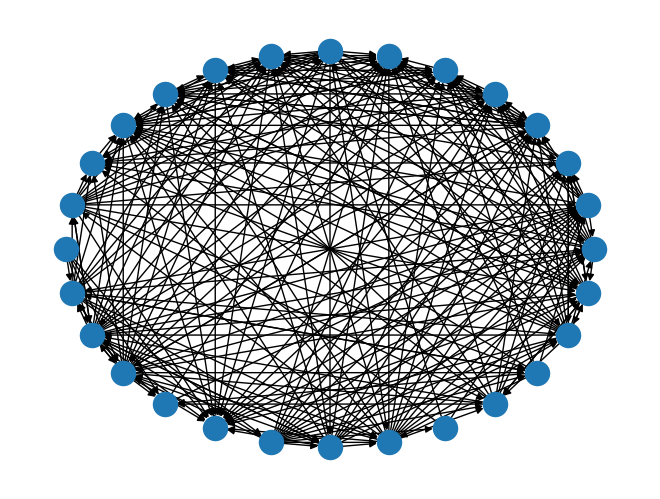

In [15]:
# shell
pos = nx.shell_layout(G)
nx.draw(G, pos=pos)

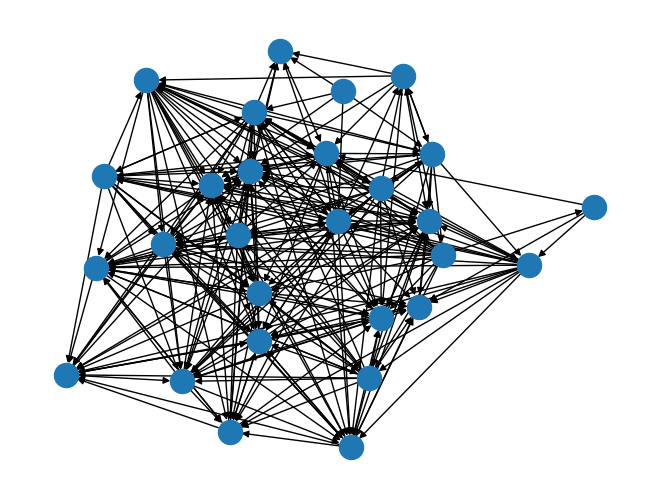

In [16]:
# kamada kawai
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos=pos)

let's go with spring

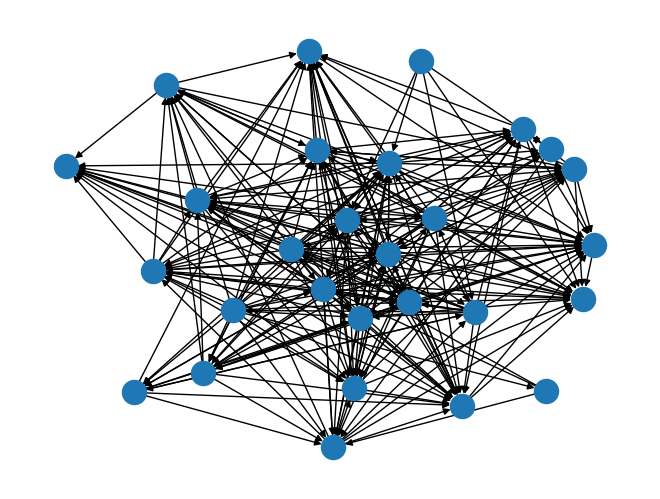

In [17]:
# SPRING
pos = nx.spring_layout(G, k=5, iterations=100, seed=87)
nx.draw(G, pos=pos)

In [18]:
# extract the node positions and add them to our data
for n, p in pos.items():
    G.nodes[n]['pos'] = p

#### now start to assemble in plotly
- from dash documentation

In [19]:
# instantiate an empty plot space
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=1.0, color='#777'),
    hoverinfo='none',
    mode='lines'
)

# now map the edges to the plotspace
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

In [20]:
# used for node sizing
ages_for_size = [(G.nodes[key]['age']+2)**2 for key in G.nodes]

In [21]:
# instantiate empty plot space
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        #size=10,#WORKING
        size=ages_for_size,
        #sizemin=10,
        colorbar=dict(
            thickness=15,
            title='Connection Count',
            xanchor='left',
            titleside='right'
        ),  
        line=dict(width=2)))

# now map the nodes to the plotspace
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

In [22]:
# color based on connection count
# can experiment with others
# e.g. dominance index or something

for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = adjacencies[0] +' # of connections: '+str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])

In [23]:
node_trace['marker']

scatter.Marker({
    'color': [5, 14, 18, 17, 2, 0, 16, 14, 16, 3, 10, 7, 14, 11, 11, 9, 7, 10, 7,
              2, 1, 16, 9, 6, 6, 3, 1, 15],
    'colorbar': {'thickness': 15, 'title': {'side': 'right', 'text': 'Connection Count'}, 'xanchor': 'left'},
    'colorscale': [[0.0, 'rgb(255,255,217)'], [0.125, 'rgb(237,248,177)'], [0.25,
                   'rgb(199,233,180)'], [0.375, 'rgb(127,205,187)'], [0.5,
                   'rgb(65,182,196)'], [0.625, 'rgb(29,145,192)'], [0.75,
                   'rgb(34,94,168)'], [0.875, 'rgb(37,52,148)'], [1.0,
                   'rgb(8,29,88)']],
    'line': {'width': 2},
    'reversescale': True,
    'showscale': True,
    'size': [100, 100, 36, 81, 100, 25, 49, 36, 81, 121, 64, 36, 121, 9, 121, 121,
             36, 9, 9, 25, 25, 9, 81, 9, 121, 25, 36, 121]
})

include plot of the edge labels.
solution from: https://community.plotly.com/t/displaying-edge-labels-of-networkx-graph-in-plotly/39113/3

In [24]:
def get_edge_trace(G):
    edge_x = []
    edge_y = []

    etext = [f'weight {w}' for w in list(nx.get_edge_attributes(G, 'weight').values())]
    xtext=[]
    ytext=[]
    for edge in G.edges():

        x0, y0 = G.nodes[edge[0]]['pos']
        x1, y1 = G.nodes[edge[1]]['pos']
        xtext.append((x0+x1)/2)
        ytext.append((y0+y1)/2)
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#777'),
        mode='lines'
    )
    eweights_trace = go.Scatter(x=xtext,y=ytext, mode='text',
                              marker_size=1,
                              #text=[0.45, 0.7, 0.34],
                              textposition='top center',
                              hovertemplate='weight: %{text}<extra></extra>'
                              #hovertemplate=f'weight: {text}'
                               )
    return edge_trace, eweights_trace

In [25]:
edge_trace, eweights_trace = get_edge_trace(G)

Finally, plot the network

In [26]:
# now plot
fig = go.Figure(data=[edge_trace, node_trace, eweights_trace],
             layout=go.Layout(
                title='VIOLENT SHEEP',
                titlefont=dict(size=20),
                title_x=0.5, # center the title
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    #text="Connection Count",
                    showarrow=True,
                   xref="paper", yref="paper") ],
                    #)],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

# add a little text box
fig.update_layout(annotations=[
            go.layout.Annotation(
                text='Wins & Losses<br>Female BigHorns<br>1984',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=0.0,
                y=1.0,
                bordercolor='black',
                borderwidth=1
            )])
#fig.show()

# write out viz
file_name = "plotly_sheep_network.html"
fig.write_html(file_name)

# launch in new tab for more screen space
webbrowser.open("file://" + os.getcwd() + "/" + file_name)

True